In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [3]:
df = pd.read_csv(r"C:\Users\bliss\Dropbox\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S33_L194\1.02. Multiple linear regression.csv")
df

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [5]:
df.shape

(84, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Rand 1,2,3  84 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


In [9]:
df.isna()

,SAT,GPA,"Rand 1,2,3"
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
79,False,False,False
80,False,False,False
81,False,False,False
82,False,False,False


In [11]:
df.isna().sum()

SAT           0
GPA           0
Rand 1,2,3    0
dtype: int64

In [13]:
df.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [15]:
df.corr()

,SAT,GPA,"Rand 1,2,3"
SAT,1.000000,0.637184,-0.031722
GPA,0.637184,1.000000,-0.046224
"Rand 1,2,3",-0.031722,-0.046224,1.000000


In [21]:
x = df.drop("GPA",axis=1)
x

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3
2,1760,3
3,1685,3
4,1693,2
...,...,...
79,1936,3
80,1810,1
81,1987,3
82,1962,1


In [23]:
y = df[['GPA']]
y

,GPA
0,2.40
1,2.52
2,2.54
3,2.74
4,2.83
...,...
79,3.71
80,3.71
81,3.73
82,3.76


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [27]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(67, 2) (17, 2) (67, 1) (17, 1)


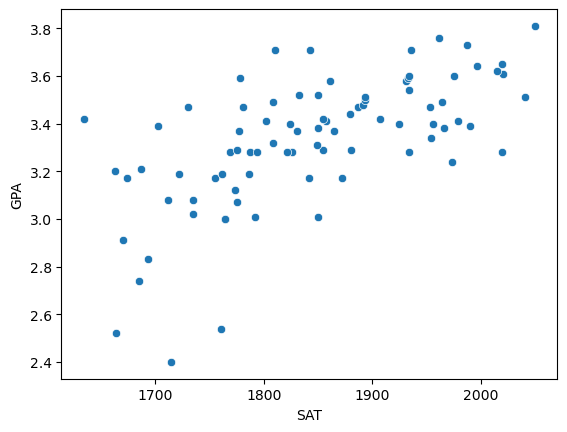

In [31]:
sns.scatterplot(data=df,x=df['SAT'],y=df['GPA'])
plt.show()

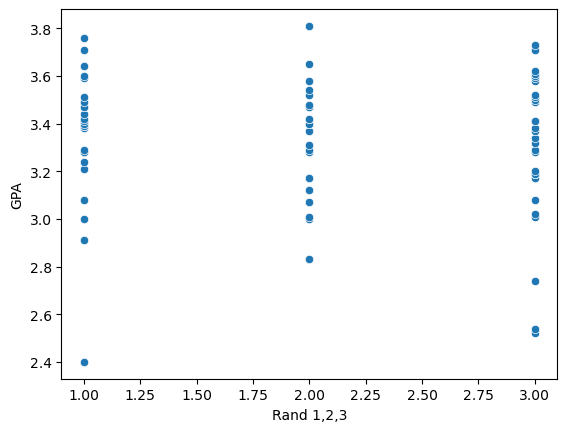

In [33]:
sns.scatterplot(data=df,x=df['Rand 1,2,3'],y=df['GPA'])
plt.show()

In [35]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)
y_test_pred = mlr.predict(x_test)

In [37]:
y_test_pred

array([[3.06485222],
       [3.07974678],
       [3.27375581],
       [3.60832512],
       [3.3480691 ],
       [3.4158934 ],
       [3.25412932],
       [3.50404295],
       [3.35980904],
       [3.25097471],
       [3.47495261],
       [3.0948211 ],
       [3.53243451],
       [3.30232714],
       [3.05293252],
       [3.08781309],
       [3.5135068 ]])

In [39]:
r2 = r2_score(y_test,y_test_pred)
r2

0.46954972353505653

In [41]:
mse = mean_squared_error(y_test,y_test_pred)
mae = mean_absolute_error(y_test,y_test_pred)
mape = mean_absolute_percentage_error(y_test,y_test_pred)
rmse = root_mean_squared_error(y_test,y_test_pred)

In [43]:
print(f"MSE = {mse}\nMAE = {mae}\nMAPE = {mape}\nRMSE = {rmse}\n")

MSE = 0.04825996234980193
MAE = 0.1810849421940439
MAPE = 0.05656385253588501
RMSE = 0.21968150206560844

